In [1]:
#!pip install mlxtend
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial.distance import cosine
import networkx as nx
import nltk
from nltk.util import ngrams
import matplotlib as mpl

In C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [4]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('C:/Users/ASUS/Downloads/K2D-Regular.ttf')
mpl.rc('font', family='K2D', size=12, weight=200)

In [ ]:
#!pip install matplotlib

In [5]:
import pandas as pd

df = pd.read_excel('Customer Reccommandation data.xlsx') #encoding="utf-8")
df.head(5)

,User Id,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,2,0,1,0,1,0,0,0,1,0,...,1,0,0,0,1,1,0,1,0,1
2,3,1,0,0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,1,1,1
3,4,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,1,1


In [6]:
prep = df.iloc[2:,1:].reset_index(drop=True).rename_axis('User Id').copy()

In [7]:
prep.to_csv('customer_pref.csv')

In [8]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [9]:
df = pd.read_csv('customer_pref.csv', index_col=0)
print(df.shape)
df.head()

(44, 60)


,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
User Id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,1,0,1,1,1
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,1
3,1,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,1,1


In [10]:
frequent_itemsets = apriori(df, use_colnames=True)

In [11]:
frequent_itemsets.head()

,support,itemsets
0,0.545455,(คอลลาเจน)
1,0.750000,(ต้นไม้ประดับห้อง)
2,0.863636,(หมอนข้าง)
3,0.681818,(ตาชั่ง )
4,0.931818,(กะหรี่(ปั๊บ))


In [12]:
rules_mlxtend = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_mlxtend.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(คอลลาเจน),(กะหรี่(ปั๊บ)),0.545455,0.931818,0.522727,0.958333,1.028455,0.014463,1.636364
1,(กะหรี่(ปั๊บ)),(คอลลาเจน),0.931818,0.545455,0.522727,0.560976,1.028455,0.014463,1.035354
2,(กระเป๋า),(คอลลาเจน),1.000000,0.545455,0.545455,0.545455,1.000000,0.000000,1.000000
3,(คอลลาเจน),(กระเป๋า),0.545455,1.000000,0.545455,1.000000,1.000000,0.000000,inf
4,(ชาบู),(คอลลาเจน),1.000000,0.545455,0.545455,0.545455,1.000000,0.000000,1.000000


In [13]:
#rules_mlxtend[ (rules_mlxtend['support'] >= 0.6) & (rules_mlxtend['confidence'] >= 0.98) & (rules_mlxtend['leverage'] >= 0.1) ]

In [20]:
Basket = rules_mlxtend[(rules_mlxtend['antecedents'].apply(len) == 1) & (rules_mlxtend['consequents'].apply(len) == 1) & (rules_mlxtend['lift']) & (rules_mlxtend['confidence'] > 0.9)]
print(Basket.shape)
Basket.sort_values('lift', ascending=False).head(20)

(110, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
163,(เนื้อวากิล),(เนื้อย่าง),0.681818,0.727273,0.659091,0.966667,1.329167,0.163223,8.181818
162,(เนื้อย่าง),(เนื้อวากิล),0.727273,0.681818,0.659091,0.906250,1.329167,0.163223,3.393939
160,(เนื้อวากิล),(หมูแดดเดียว),0.681818,0.795455,0.613636,0.900000,1.131429,0.071281,2.045455
44,(Lego),(หมอนข้าง),0.636364,0.863636,0.590909,0.928571,1.075188,0.041322,1.909091
100,(น้ำส้มดีโด้),(กะหรี่(ปั๊บ)),0.636364,0.931818,0.636364,1.000000,1.073171,0.043388,inf
48,(ที่ยกน้ำหนัก (Dumbell)),(หมอนข้าง),0.613636,0.863636,0.568182,0.925926,1.072125,0.038223,1.840909
37,(ต้นไม้ประดับห้อง),(เม็ดมะม่วงหิมพานต์),0.750000,0.909091,0.727273,0.969697,1.066667,0.045455,3.000000
195,(เนื้อย่าง),(เม็ดมะม่วงหิมพานต์),0.727273,0.909091,0.704545,0.968750,1.065625,0.043388,2.909091
169,(เนื้อวากิล),(เม็ดมะม่วงหิมพานต์),0.681818,0.909091,0.659091,0.966667,1.063333,0.039256,2.727273
13,(ต้นไม้ประดับห้อง),(หมอนข้าง),0.750000,0.863636,0.681818,0.909091,1.052632,0.034091,1.500000


In [21]:
#trigram_df = pd.concat([Basket])

In [22]:
#!pip install pythainlp

In [23]:
edgelist = []
for i,x in Basket.iterrows():
    n1, = x['antecedents']
    n2, = x['consequents']
    attr = { 'lift': round(x['lift'],4), 'confidence' : round(x['confidence'],4) }
    edgelist.append((n1,n2,attr))

nodes = { n1 for n1, n2, attr in edgelist}.union({ n2 for n1, n2, attr in edgelist})

support_df = frequent_itemsets[frequent_itemsets['itemsets'].apply(len)==1].copy()
support_df['item'] = support_df['itemsets'].apply(lambda x: list(x)[0])
support_df = support_df[support_df['item'].isin(nodes)]

nodelist = []
for i,x in support_df.iterrows():
    n = x['item']
    attr = { 'support' : round(x['support'],4) }
    nodelist.append((n, attr))

# create graph
G = nx.DiGraph()

G.add_nodes_from(nodelist)
G.add_edges_from(edgelist)

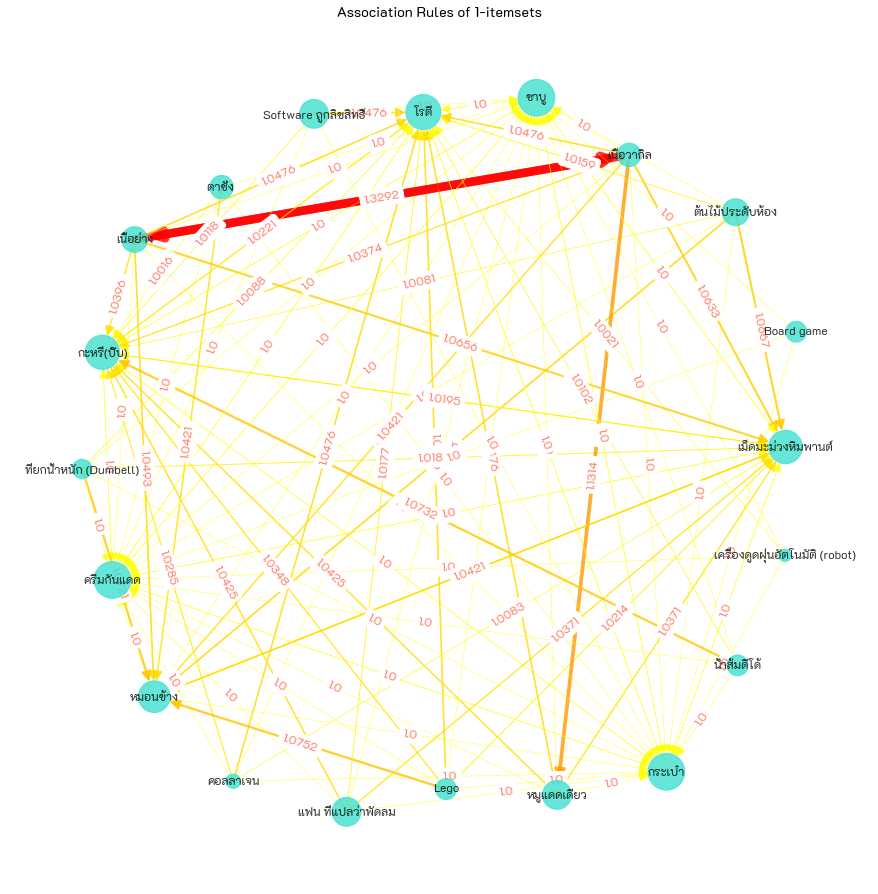

In [25]:
nodelist, node_size = zip(*[(n,d['support']) for n,d in G.nodes(data=True)])
node_size = 150 + ((np.array(node_size) - min(node_size)) / (max(node_size) - min(node_size)))*1200
edgelist, width = zip(*[((u,v), d['lift'])for u,v,d in G.edges(data=True)])

width = .5 + ((np.array(width) - min(width)) / (max(width) - min(width)))*8

labels_params = {'font_family': 'K2D', 'alpha':.8, 'font_size':12}

plt.figure(figsize=(12,12))

# pos = nx.spring_layout(G, k=5, weight='lift', iterations=120, seed=120, scale=2.5)
pos = nx.spring_layout(G, k=5, weight='confidence', iterations=80, seed=90, scale=2.5)
nx.draw(G, pos, with_labels=True, arrowsize=20, 
        edgelist=edgelist, width=width, edge_color=width, edge_cmap=plt.cm.autumn_r, #edge_color='.75',
        nodelist=nodelist, node_size=node_size, node_color='turquoise', 
        **labels_params)
edge_labels = nx.get_edge_attributes(G, 'lift')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='tomato',  **labels_params)

plt.title('Association Rules of 1-itemsets')
# plt.savefig('plots/association-rules-1.jpg', dpi=120)
plt.show()

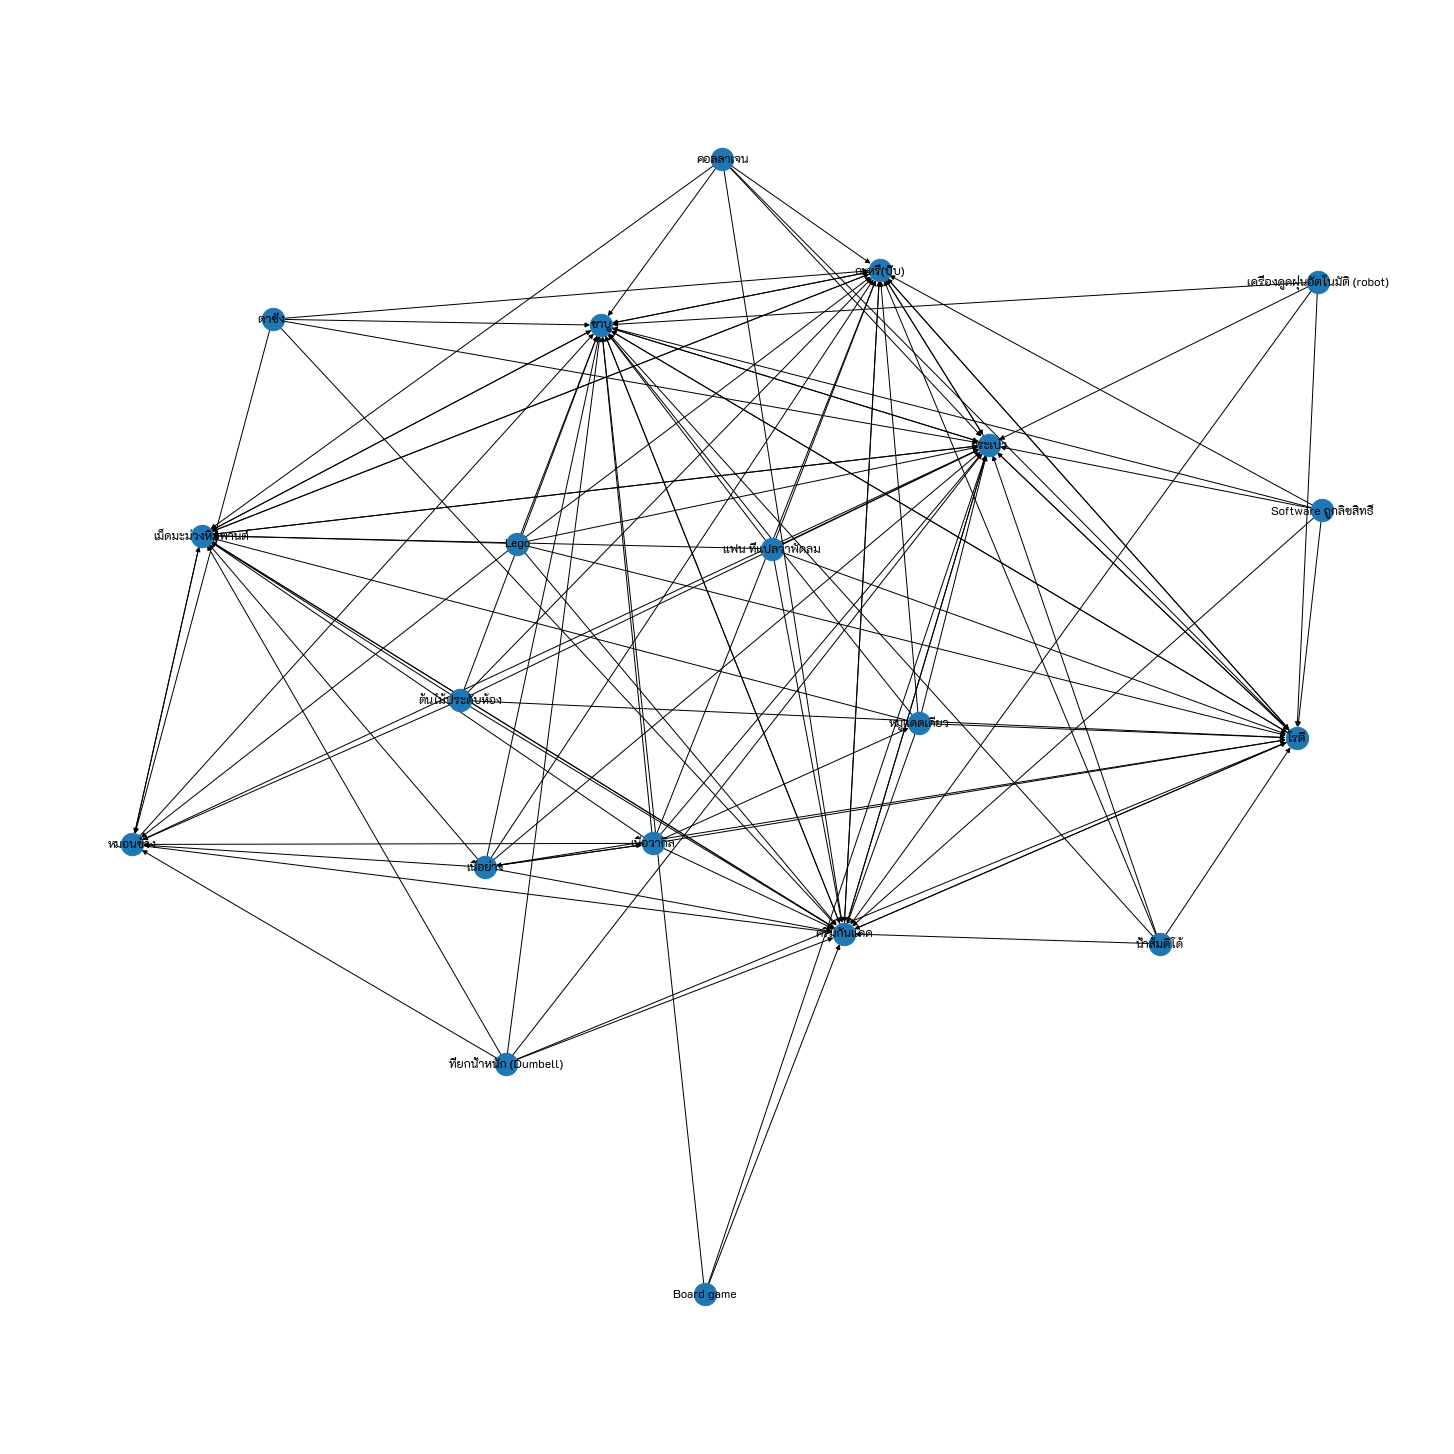

In [26]:
nx.draw(G, node_size=500,with_labels=True,font_family='K2D') 
plt.axis('equal')
plt.rcParams["figure.figsize"] = (20,20)
plt.show()